In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import kagglehub

In [22]:
# Dataset

path = kagglehub.dataset_download("ayessa/birthday")
bday = pd.read_csv(path+"/US_births_2000-2014_SSA.csv")
bday.head()

,year,month,date_of_month,day_of_week,births,date
0,2000.0,1.0,1.0,6.0,9083.0,1/1/2000
1,2000.0,1.0,2.0,7.0,8006.0,1/2/2000
2,2000.0,1.0,3.0,1.0,11363.0,1/3/2000
3,2000.0,1.0,4.0,2.0,13032.0,1/4/2000
4,2000.0,1.0,5.0,3.0,12558.0,1/5/2000


In [23]:
bday.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [24]:
are_all_null = bday.iloc[5479:].isnull().all().all()
if are_all_null:
    print(f"{are_all_null} : values are null after row 5479")
else:
    print(f"{are_all_null} : values are not null after row 5479")


True : values are null after row 5479


In [25]:
# Copy the first 5479 rows
bday = bday[:5479].copy()
# bday.tail()
bday.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [26]:
# Basic data cleaning
bday["birth_date"] = pd.to_datetime(bday["date"])
bday["day_of_year"] = bday["birth_date"].dt.dayofyear
bday["month"] = bday["birth_date"].dt.month
bday["year"] = bday["birth_date"].dt.year
bday["is_weekend"] = bday["birth_date"].dt.dayofweek >= 5  
bday.drop(columns=["date"], inplace=True)
bday.tail()

,year,month,date_of_month,day_of_week,births,birth_date,day_of_year,is_weekend
5474,2014,12,27.0,6.0,8656.0,2014-12-27,361,True
5475,2014,12,28.0,7.0,7724.0,2014-12-28,362,True
5476,2014,12,29.0,1.0,12811.0,2014-12-29,363,False
5477,2014,12,30.0,2.0,13634.0,2014-12-30,364,False
5478,2014,12,31.0,3.0,11990.0,2014-12-31,365,False


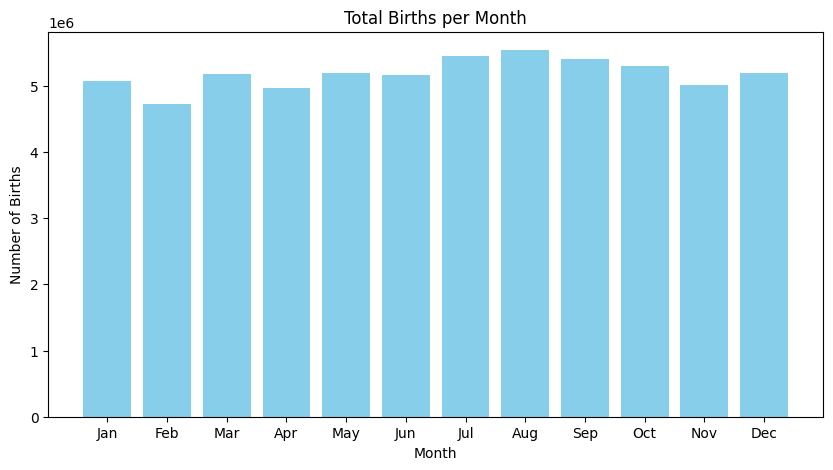

In [27]:
monthly_birth = bday.groupby("month")["births"].sum()
monthly_birth_sorted = monthly_birth.sort_index()
plt.figure(figsize=(10, 5))
plt.bar(monthly_birth_sorted.index, monthly_birth_sorted.values , color='skyblue')
plt.xlabel("Month")
plt.ylabel("Number of Births")
plt.title("Total Births per Month")
plt.xticks(monthly_birth_sorted.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

We can see that most of the births are in the month of August and least in February.

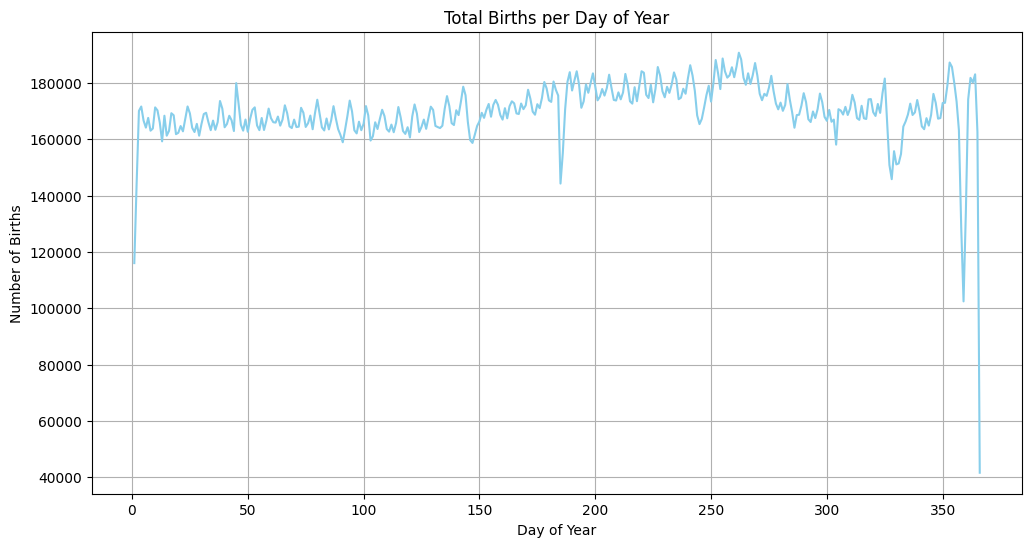

In [28]:
birth_day_of_year = bday.groupby("day_of_year")["births"].sum()

plt.figure(figsize=(12, 6))
plt.plot(birth_day_of_year.index, birth_day_of_year.values, color='skyblue',  linestyle='-')
plt.xlabel("Day of Year")
plt.ylabel("Number of Births")
plt.title("Total Births per Day of Year")
plt.grid()
plt.show()

We can see consistent births throughout the year, with a slight increase in the summer months and a decrease during the winter holidays.

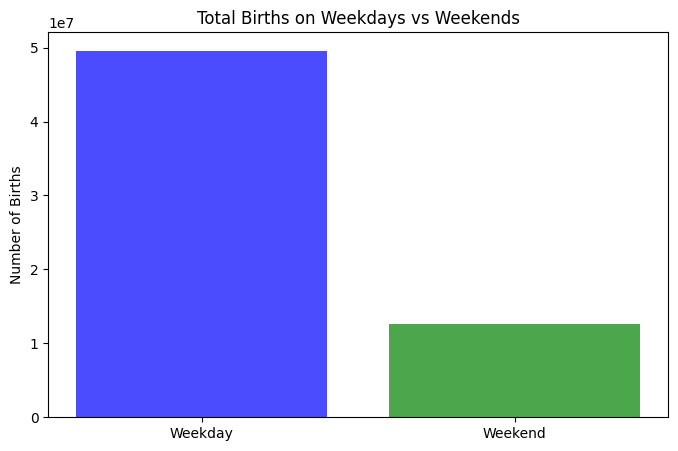

In [29]:
weekend_and_week_births = bday.groupby("is_weekend")["births"].sum()

weekend_and_week_births.index = ["Weekday", "Weekend"]


plt.figure(figsize=(8, 5))
plt.bar(weekend_and_week_births.index, weekend_and_week_births.values, color=["blue" , "green"] , alpha=0.7)
plt.title("Total Births on Weekdays vs Weekends")
plt.ylabel("Number of Births")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
from scipy.stats import binom

# binom.pmf(0,n)

probability_week = bday["is_weekend"].value_counts() / bday["is_weekend"].value_counts().sum()

weekend_prob = probability_week[True]

n = len(bday)


print(weekend_prob)

ds = np.arange(0, 10, 1)
print(ds)

0.2858185800328527
[0 1 2 3 4 5 6 7 8 9]


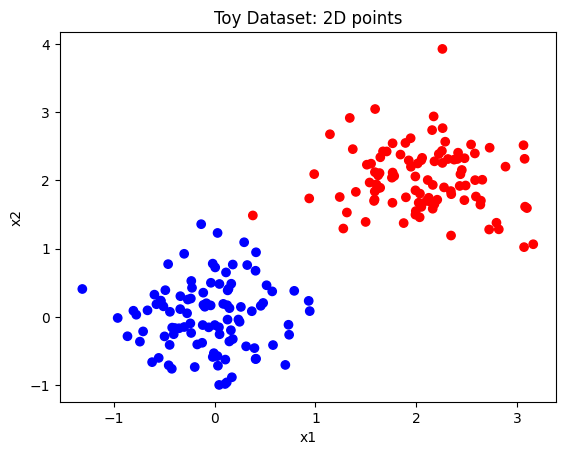

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # reproducibility

# Class 0: centered at (0,0)
class0 = np.random.randn(100, 2) * 0.5 + np.array([0, 0])

# Class 1: centered at (2,2)
class1 = np.random.randn(100, 2) * 0.5 + np.array([2, 2])

# Combine
X = np.vstack([class0, class1])  # shape (200,2)
y = np.array([0]*100 + [1]*100)  # labels (200,)

# Visualize
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Toy Dataset: 2D points")
plt.show()


In [35]:
# Helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Initialize weights
np.random.seed(1)
W1 = np.random.randn(2, 3) * 0.01
b1 = np.zeros((1, 3))
W2 = np.random.randn(3, 1) * 0.01
b2 = np.zeros((1, 1))

# Training loop
lr = 0.1
for epoch in range(1000):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # Loss (binary cross entropy)
    m = y.shape[0]
    loss = -(1/m) * np.sum(y*np.log(y_hat+1e-8) + (1-y)*np.log(1-y_hat+1e-8))

    # Backprop
    dz2 = y_hat - y.reshape(-1,1)
    dW2 = (a1.T @ dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = (X.T @ dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # Print loss occasionally
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")



# Predictions
y_pred = (y_hat > 0.5).astype(int).flatten()
accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)


Epoch 0, Loss: 138.6294
Epoch 100, Loss: 205.7429
Epoch 200, Loss: 296.7592
Epoch 300, Loss: 361.9578
Epoch 400, Loss: 411.8049
Epoch 500, Loss: 453.6303
Epoch 600, Loss: 489.8516
Epoch 700, Loss: 522.4432
Epoch 800, Loss: 551.9554
Epoch 900, Loss: 578.8970
Final Accuracy: 1.0
